/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


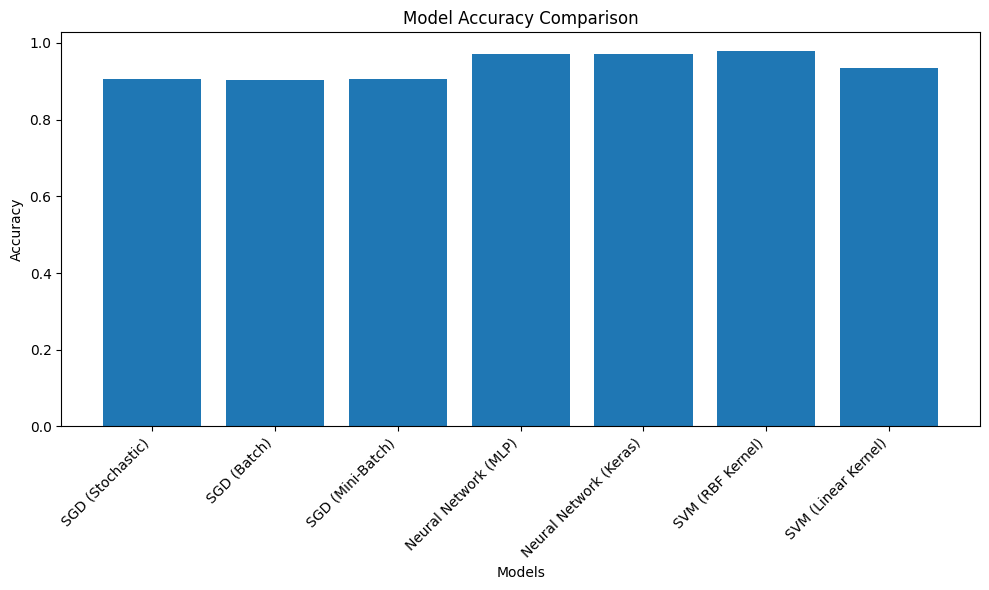

Model Performance Comparison:
SGD (Stochastic): 90.71%
SGD (Batch): 90.45%
SGD (Mini-Batch): 90.71%
Neural Network (MLP): 97.12%
Neural Network (Keras): 97.23%
SVM (RBF Kernel): 97.88%
SVM (Linear Kernel): 93.60%


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow import keras

# Load and Preprocess Data
def load_and_preprocess_data():
    # Simulated data loading - replace with actual Kaggle dataset path
    train_data = pd.read_csv('/content/train.csv')
    X = train_data.drop('label', axis=1).values
    y = train_data['label'].values

    # Normalize pixel values
    X = X / 255.0

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test

# Gradient Descent Variants
class GradientDescentVariants:
    @staticmethod
    def stochastic_gradient_descent(X, y, X_test, y_test):
        # Use SGDClassifier for Stochastic Gradient Descent
        sgd_clf = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3, random_state=42)
        sgd_clf.fit(X, y)
        return sgd_clf.score(X_test, y_test)

    @staticmethod
    def batch_gradient_descent(X, y, X_test, y_test):
        # Use SGDClassifier with large batch size
        batch_clf = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3, random_state=42,
                                  learning_rate='constant', eta0=0.01)
        batch_clf.fit(X, y)
        return batch_clf.score(X_test, y_test)

    @staticmethod
    def mini_batch_gradient_descent(X, y, X_test, y_test):
        # Use SGDClassifier with default mini-batch behavior
        mini_batch_clf = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3, random_state=42)
        mini_batch_clf.fit(X, y)
        return mini_batch_clf.score(X_test, y_test)

# Model Comparison Class
class DigitRecognizerModelComparison:
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.results = {}

    def gradient_descent_comparisons(self):
        # Compare different gradient descent approaches
        self.results['SGD (Stochastic)'] = GradientDescentVariants.stochastic_gradient_descent(
            self.X_train, self.y_train, self.X_test, self.y_test)

        self.results['SGD (Batch)'] = GradientDescentVariants.batch_gradient_descent(
            self.X_train, self.y_train, self.X_test, self.y_test)

        self.results['SGD (Mini-Batch)'] = GradientDescentVariants.mini_batch_gradient_descent(
            self.X_train, self.y_train, self.X_test, self.y_test)

    def neural_network_models(self):
        # Multi-layer Perceptron
        mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
        mlp.fit(self.X_train, self.y_train)
        self.results['Neural Network (MLP)'] = mlp.score(self.X_test, self.y_test)

        # TensorFlow/Keras Neural Network
        model = keras.Sequential([
            keras.layers.Dense(128, activation='relu', input_shape=(self.X_train.shape[1],)),












            keras.layers.Dense(64, activation='relu'),
            keras.layers.Dense(10, activation='softmax')
        ])
        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        model.fit(self.X_train, self.y_train, epochs=10, batch_size=32, verbose=0)
        _, keras_accuracy = model.evaluate(self.X_test, self.y_test, verbose=0)
        self.results['Neural Network (Keras)'] = keras_accuracy

    def support_vector_machines(self):
        # SVM with different kernels
        svm_rbf = SVC(kernel='rbf')
        svm_rbf.fit(self.X_train, self.y_train)
        self.results['SVM (RBF Kernel)'] = svm_rbf.score(self.X_test, self.y_test)

        svm_linear = SVC(kernel='linear')
        svm_linear.fit(self.X_train, self.y_train)
        self.results['SVM (Linear Kernel)'] = svm_linear.score(self.X_test, self.y_test)

    def visualize_results(self):
        plt.figure(figsize=(10, 6))
        plt.bar(list(self.results.keys()), list(self.results.values()))
        plt.title('Model Accuracy Comparison')
        plt.xlabel('Models')
        plt.ylabel('Accuracy')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    def detailed_comparison(self):
        # Print detailed results
        print("Model Performance Comparison:")
        for model, accuracy in self.results.items():
            print(f"{model}: {accuracy * 100:.2f}%")

# Main Execution
def main():
    X_train, X_test, y_train, y_test = load_and_preprocess_data()

    # Dimensionality Reduction (Optional)
    pca = PCA(n_components=100)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Model Comparison
    comparison = DigitRecognizerModelComparison(X_train_pca, X_test_pca, y_train, y_test)
    comparison.gradient_descent_comparisons()
    comparison.neural_network_models()
    comparison.support_vector_machines()

    # Visualizations
    comparison.visualize_results()
    comparison.detailed_comparison()

if __name__ == '__main__':
    main()